# Data Viz and Exploration with BigQuery and Jupyter

[See doc](https://cloud.google.com/bigquery/docs/visualize-jupyter)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

The BigQuery client library for Python provides a magic command that lets you run queries with minimal code. 
The BigQuery client library for Python provides a cell magic, `%%bigquery`, which runs a SQL query and returns the results as a Pandas DataFrame.

Load the magic commands from the client library:

In [2]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


## Airport zones

In [4]:
%%bigquery airport_zones_df
SELECT 
    DISTINCT zone_name, zone_id
FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`
WHERE zone_name LIKE '%irport%'

In [55]:
airport_zones_df

,zone_name,zone_id
0,Newark Airport,1
1,JFK Airport,132
2,LaGuardia Airport,138


## Trip duration

In [6]:
%%bigquery trip_duration_df
SELECT
    trip_duration,
    COUNT(trip_duration) AS record_count
FROM `event-driven-ml.edml_nyc_yellow_taxi_us.viz_gis_feat_eng_2018`
GROUP BY trip_duration
ORDER BY trip_duration ASC

In [7]:
trip_duration_df.head()

,trip_duration,record_count
0,1,747445
1,2,2302094
2,3,4168261
3,4,5552939
4,5,6301887


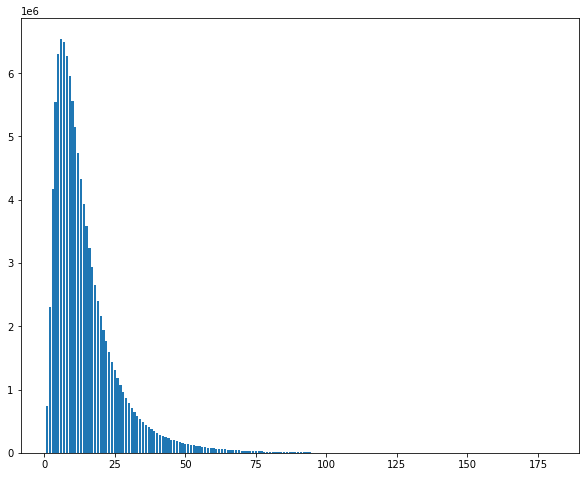

In [8]:
plt.figure(figsize=(10, 8))
plt.bar(trip_duration_df.trip_duration, trip_duration_df.record_count)
plt.show()

## Trip duration and airport

In [9]:
%%bigquery
SELECT
    COUNT(flag_airport) 
FROM `event-driven-ml.edml_nyc_yellow_taxi_us.viz_gis_feat_eng_2018`
GROUP BY flag_airport

,f0_
0,99110947
1,7663211


In [10]:
%%bigquery
SELECT
    AVG(trip_duration) OVER() AS avg,
    STDDEV(trip_duration) OVER() AS std,
    MIN(trip_duration) OVER() AS min,
    PERCENTILE_CONT(trip_duration, 0.05) OVER() AS percentile5,
    PERCENTILE_CONT(trip_duration, 0.25) OVER() AS percentile25,
    PERCENTILE_CONT(trip_duration, 0.5) OVER() AS median,
    PERCENTILE_CONT(trip_duration, 0.75) OVER() AS percentile75,
    PERCENTILE_CONT(trip_duration, 0.95) OVER() AS percentile95,
    MAX(trip_duration) OVER() AS max,
FROM `event-driven-ml.edml_nyc_yellow_taxi_us.viz_gis_feat_eng_2018`
WHERE flag_airport=1.0
LIMIT 1;

,avg,std,min,percentile5,percentile25,median,percentile75,percentile95,max
0,36.973718,17.270983,1,14.0,25.0,34.0,47.0,69.0,180


In [13]:
%%bigquery
SELECT
    AVG(trip_duration) OVER() AS avg,
    STDDEV(trip_duration) OVER() AS std,
    MIN(trip_duration) OVER() AS min,
    PERCENTILE_CONT(trip_duration, 0.05) OVER() AS percentile5,
    PERCENTILE_CONT(trip_duration, 0.25) OVER() AS percentile25,
    PERCENTILE_CONT(trip_duration, 0.5) OVER() AS median,
    PERCENTILE_CONT(trip_duration, 0.75) OVER() AS percentile75,
    PERCENTILE_CONT(trip_duration, 0.95) OVER() AS percentile95,
    MAX(trip_duration) OVER() AS max,
FROM `event-driven-ml.edml_nyc_yellow_taxi_us.viz_gis_feat_eng_2019`
WHERE flag_airport=1.0
LIMIT 1;

,avg,std,min,percentile5,percentile25,median,percentile75,percentile95,max
0,36.036667,16.953889,1,13.0,24.0,34.0,46.0,67.0,180


## Trip distance, duration, speed (airport)

Distance is expressed in meters [ST_DISTANCE](https://cloud.google.com/bigquery/docs/reference/standard-sql/geography_functions#st_distance)

1 mile = 1609.34 meters

In [14]:
%%bigquery trip_distance_df
SELECT
    trip_distance AS actual_distance,
    centroide_distance/1609.34 AS approx_distance,
    speed,
    trip_duration,
    flag_airport
FROM `event-driven-ml.edml_nyc_yellow_taxi_us.viz_gis_feat_eng_2018`
LIMIT 10000

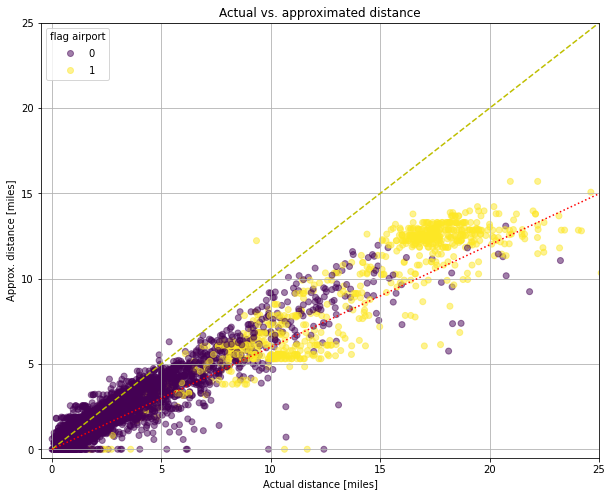

In [27]:
xmin = trip_distance_df["actual_distance"].min()
xmax = trip_distance_df["actual_distance"].max()
ymin = trip_distance_df["approx_distance"].min()
ymax = trip_distance_df["approx_distance"].max()

x = np.linspace(xmin, xmax, 1000)
y = np.linspace(ymin, ymax, 1000)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(trip_distance_df.actual_distance, trip_distance_df.approx_distance, c=trip_distance_df.flag_airport, alpha=.5) 
plt.legend(*scatter.legend_elements(), loc="upper left", title="flag airport")
plt.grid(True)
plt.xlabel("Actual distance [miles]")
plt.ylabel("Approx. distance [miles]")
plt.plot(x, x, "--y", x, y, "r:")
plt.xlim([-.5, 25])
plt.ylim([-.5, 25])
plt.title("Actual vs. approximated distance")
plt.show();

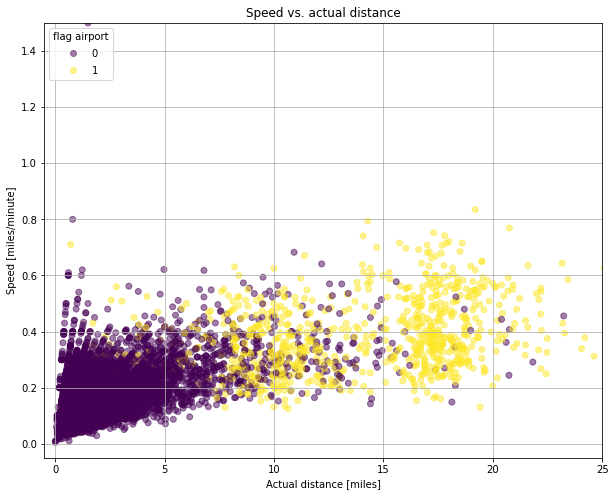

In [28]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(trip_distance_df.actual_distance, trip_distance_df.speed, c=trip_distance_df.flag_airport, alpha=.5)
plt.legend(*scatter.legend_elements(), loc="upper left", title="flag airport")
plt.grid(True)
plt.xlabel("Actual distance [miles]")
plt.ylabel("Speed [miles/minute]")
plt.title("Speed vs. actual distance")
plt.ylim([-.05, 1.5])
plt.xlim([-.5, 25])
plt.show();

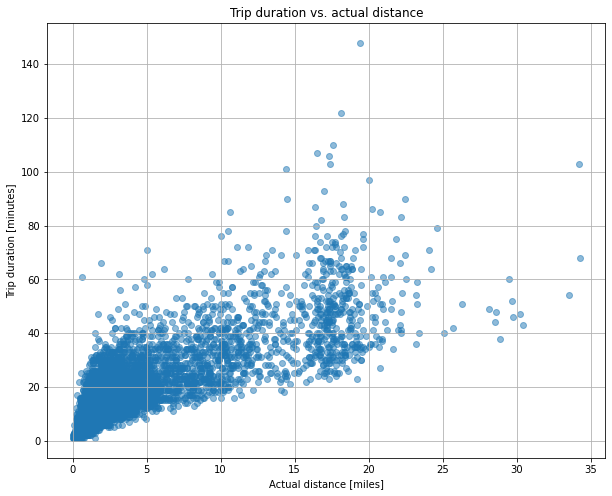

In [29]:
plt.figure(figsize=(10, 8))
plt.scatter(trip_distance_df.actual_distance, trip_distance_df.trip_duration, alpha=.5)
plt.grid(True)
plt.xlabel("Actual distance [miles]")
plt.ylabel("Trip duration [minutes]")
plt.title("Trip duration vs. actual distance")
plt.show();

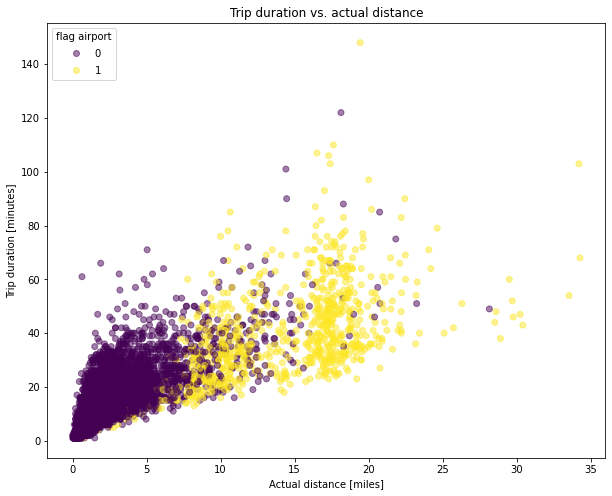

In [31]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(trip_distance_df.actual_distance, trip_distance_df.trip_duration, c=trip_distance_df.flag_airport, alpha=.5)
plt.legend(*scatter.legend_elements(), loc="upper left", title="flag airport")
plt.xlabel("Actual distance [miles]")
plt.ylabel("Trip duration [minutes]")
plt.title("Trip duration vs. actual distance")
plt.show();

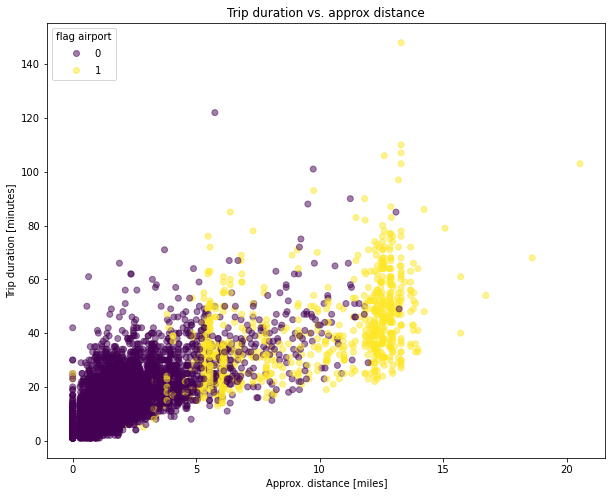

In [32]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(trip_distance_df.approx_distance, trip_distance_df.trip_duration, c=trip_distance_df.flag_airport, alpha=.5)
plt.legend(*scatter.legend_elements(), loc="upper left", title="flag airport")
plt.xlabel("Approx. distance [miles]")
plt.ylabel("Trip duration [minutes]")
plt.title("Trip duration vs. approx distance")
# plt.ylim([-.05, 1.5])
# plt.xlim([-.5, 25])
plt.show();

## Record counts per dates

In [33]:
%%bigquery count_per_weekday_df
SELECT
    dayofweek,
    COUNT(dayofweek) AS record_count,
    AVG(trip_duration) AS avg_duration
FROM `event-driven-ml.edml_nyc_yellow_taxi_us.viz_gis_feat_eng_2018`
GROUP BY dayofweek
ORDER BY dayofweek ASC

In [118]:
count_per_weekday_df

,dayofweek,record_count,avg_duration
0,0,13596773,13.110410
1,1,14100640,13.798987
2,2,15187619,14.595637
3,3,15342757,14.743677
4,4,16432516,15.522761
5,5,16436197,15.085414
6,6,15677656,13.500204


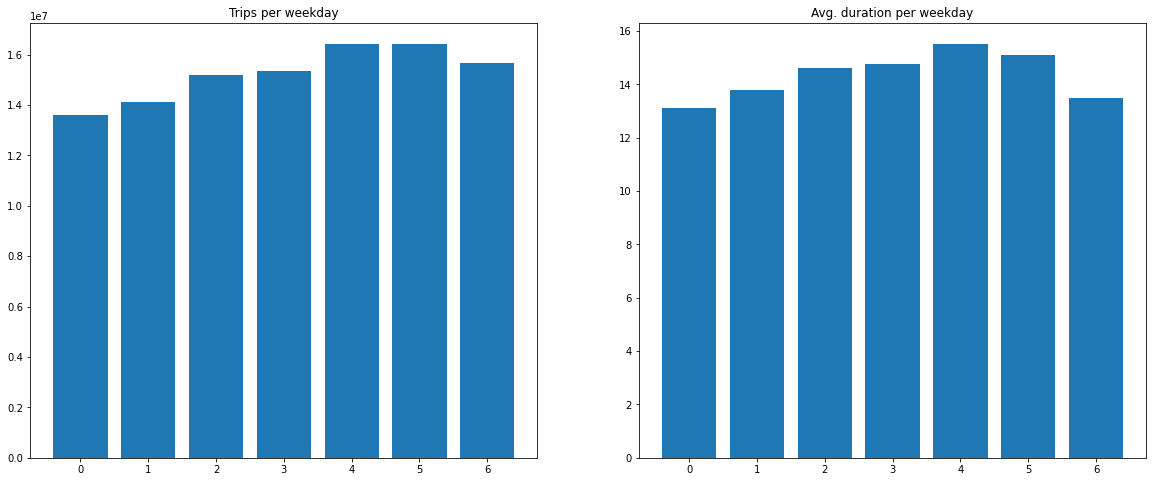

In [34]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.bar(count_per_weekday_df.dayofweek, count_per_weekday_df.record_count)
plt.title("Trips per weekday")
plt.subplot(122)
plt.bar(count_per_weekday_df.dayofweek, count_per_weekday_df.avg_duration)
plt.title("Avg. duration per weekday")
plt.show()

In [4]:
%%bigquery count_per_hourofday_df
SELECT
    hourofday,
    COUNT(hourofday) AS record_count,
    AVG(trip_duration) AS avg_duration
FROM `event-driven-ml.edml_nyc_yellow_taxi_us.viz_gis_feat_eng_2018`
GROUP BY hourofday
ORDER BY hourofday ASC

In [36]:
count_per_hourofday_df.head()

,hourofday,record_count,avg_duration
0,0,3332502,12.735256
1,1,2300702,11.879864
2,2,1631269,11.193999
3,3,1180973,11.268410
4,4,929220,11.960472


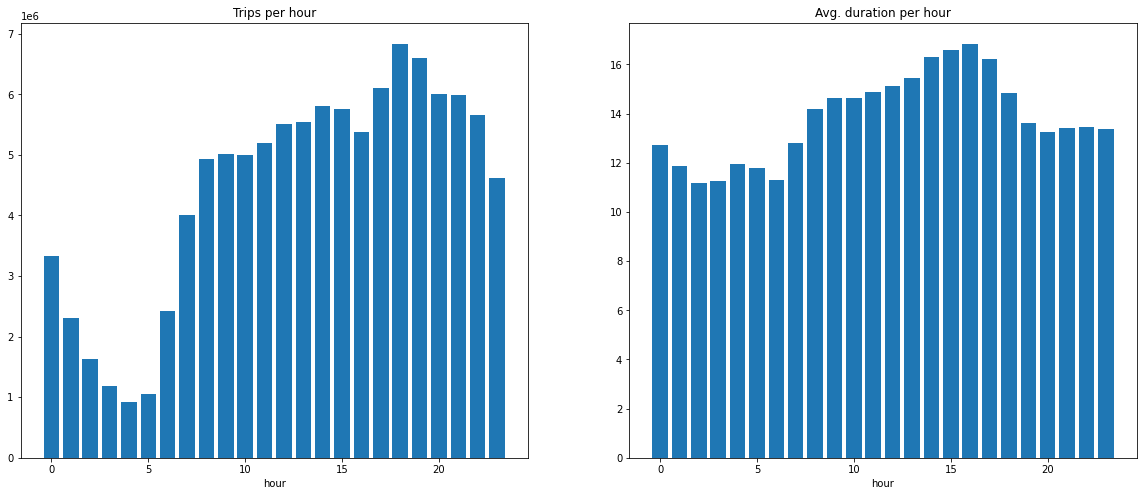

In [6]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.bar(count_per_hourofday_df.hourofday, count_per_hourofday_df.record_count)
plt.title("Trips per hour")
plt.xlabel("hour")
plt.subplot(122)
plt.bar(count_per_hourofday_df.hourofday, count_per_hourofday_df.avg_duration)
plt.title("Avg. duration per hour")
plt.xlabel("hour")
plt.show()
# plt.savefig("2018_trips_per_hour_avg_duration.png")

In [18]:
%%bigquery count_per_day_df
SELECT
    DATETIME_TRUNC(pickup_datetime, DAY) as pickup_date,
    COUNT(DATETIME_TRUNC(pickup_datetime, DAY)) AS record_count,
    AVG(trip_duration) AS avg_duration
FROM `event-driven-ml.edml_nyc_yellow_taxi_us.viz_gis_feat_eng_2018`
GROUP BY pickup_date
ORDER BY pickup_date ASC

In [12]:
count_per_day_df.head()

,pickup_date,record_count,avg_duration
0,2019-01-06,198975,11.586923
1,2019-01-07,216620,12.445301
2,2019-01-08,225978,12.908031
3,2019-01-09,243477,13.033284
4,2019-01-10,267014,13.389961


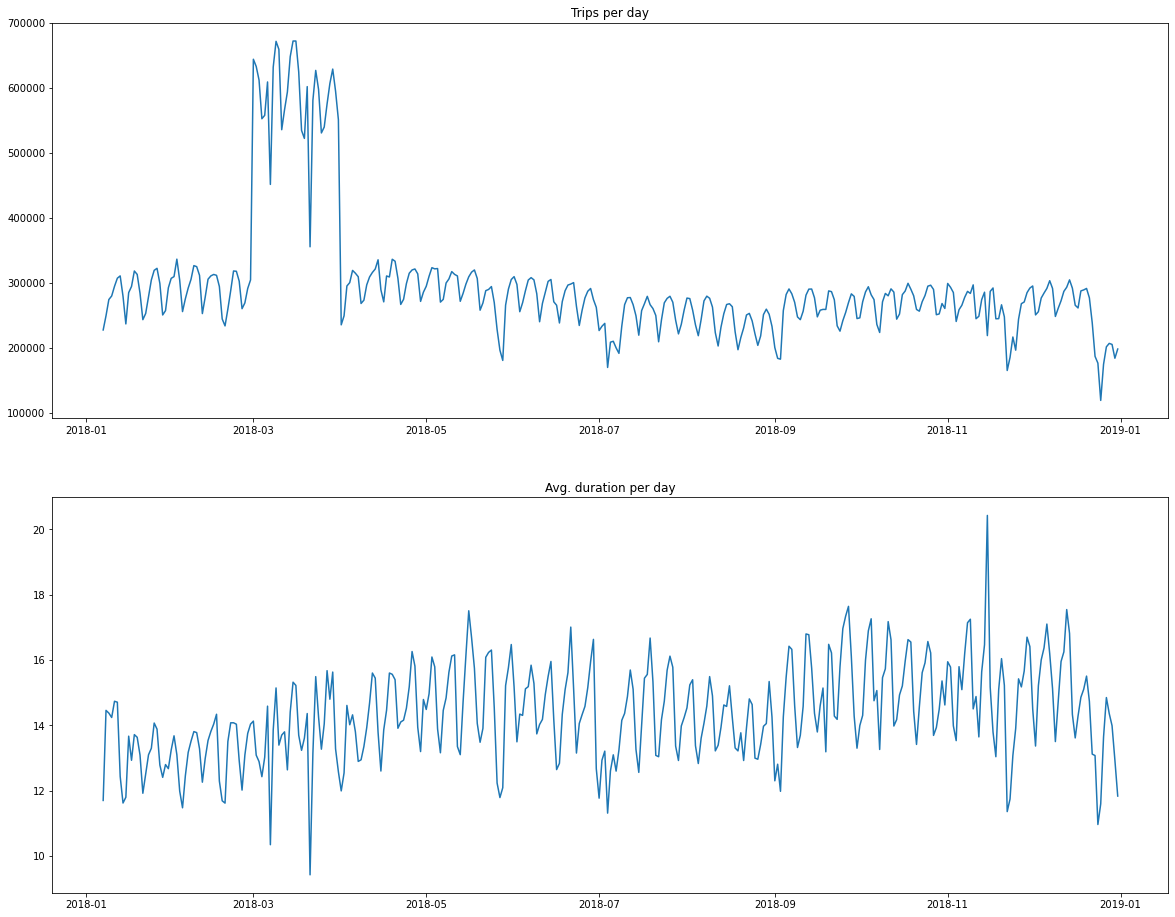

In [20]:
plt.figure(figsize=(20, 16))
plt.subplot(211)
plt.plot(count_per_day_df.pickup_date, count_per_day_df.record_count)
plt.title("Trips per day")
plt.subplot(212)
plt.plot(count_per_day_df.pickup_date, count_per_day_df.avg_duration)
plt.title("Avg. duration per day")
# plt.show()
plt.savefig("2018_trips_per_day_avg_duration.png")

#### 2017

In [21]:
%%bigquery count_per_day_df
SELECT
    DATETIME_TRUNC(pickup_datetime, DAY) as pickup_date,
    COUNT(DATETIME_TRUNC(pickup_datetime, DAY)) AS record_count,
    AVG(trip_duration) AS avg_duration
FROM `event-driven-ml.edml_nyc_yellow_taxi_us.viz_gis_feat_eng_2017`
GROUP BY pickup_date
ORDER BY pickup_date ASC

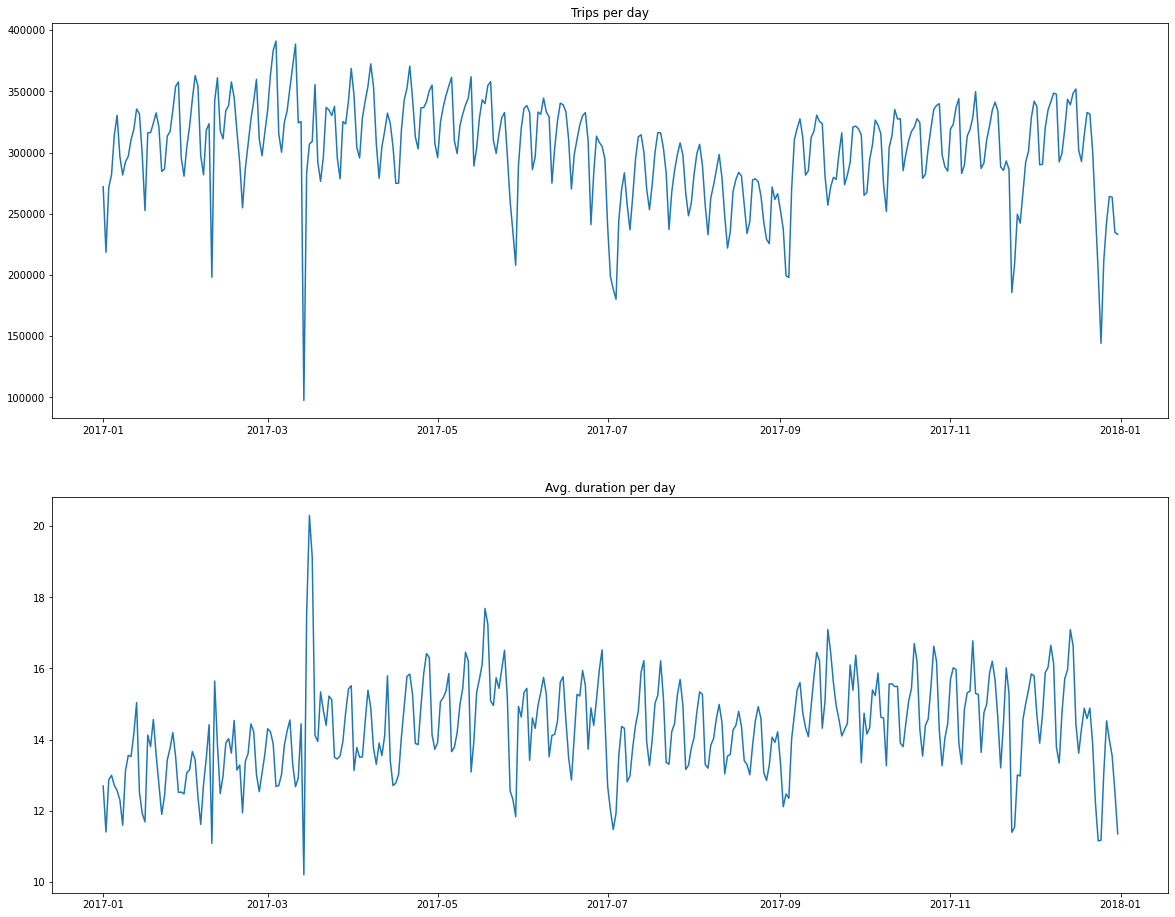

In [22]:
plt.figure(figsize=(20, 16))
plt.subplot(211)
plt.plot(count_per_day_df.pickup_date, count_per_day_df.record_count)
plt.title("Trips per day")
plt.subplot(212)
plt.plot(count_per_day_df.pickup_date, count_per_day_df.avg_duration)
plt.title("Avg. duration per day")
plt.show()
# plt.savefig("2017_trips_per_day_avg_duration.png")

#### 2019

In [23]:
%%bigquery count_per_day_df
SELECT
    DATETIME_TRUNC(pickup_datetime, DAY) as pickup_date,
    COUNT(DATETIME_TRUNC(pickup_datetime, DAY)) AS record_count,
    AVG(trip_duration) AS avg_duration
FROM `event-driven-ml.edml_nyc_yellow_taxi_us.viz_gis_feat_eng_2019`
GROUP BY pickup_date
ORDER BY pickup_date ASC

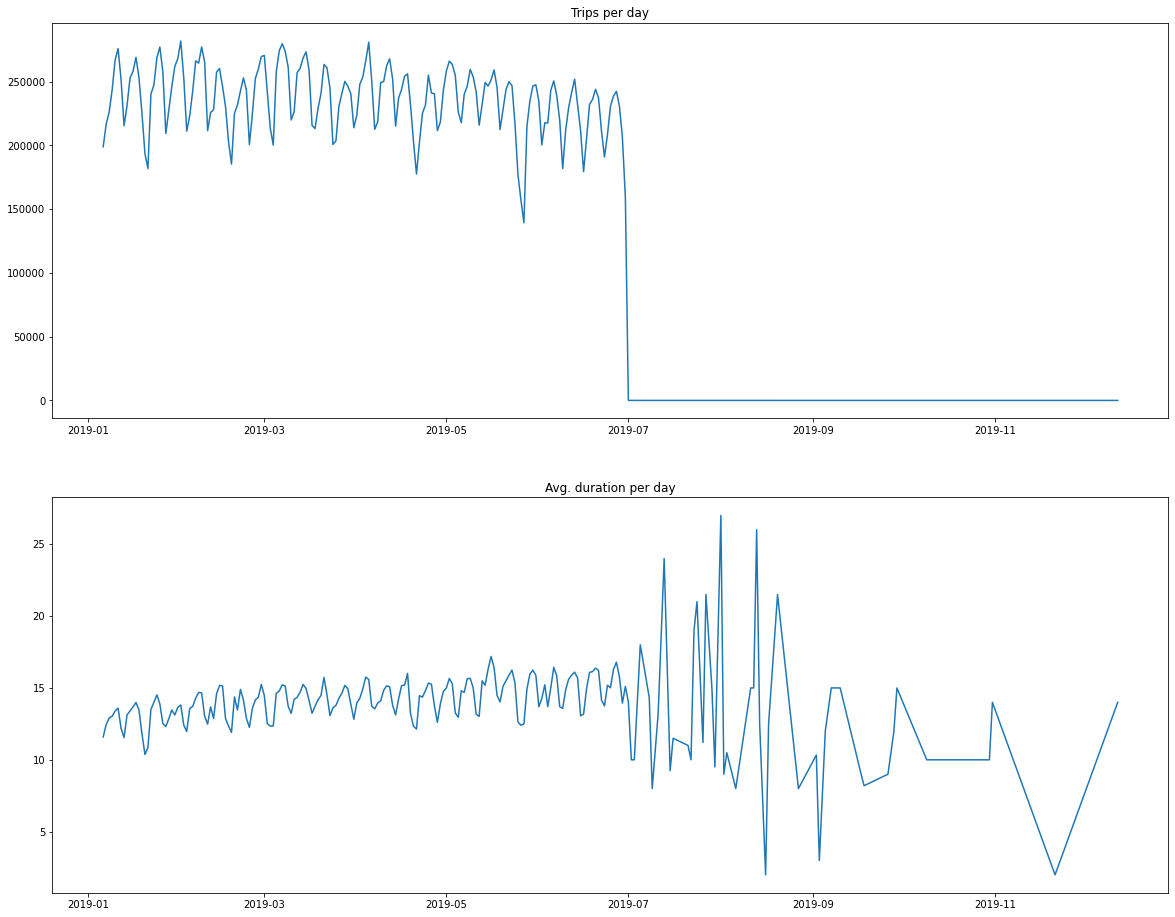

In [24]:
plt.figure(figsize=(20, 16))
plt.subplot(211)
plt.plot(count_per_day_df.pickup_date, count_per_day_df.record_count)
plt.title("Trips per day")
plt.subplot(212)
plt.plot(count_per_day_df.pickup_date, count_per_day_df.avg_duration)
plt.title("Avg. duration per day")
plt.show()
# plt.savefig("2017_trips_per_day_avg_duration.png")

## Passenger count analysis

In [41]:
%%bigquery count_passengers_df
SELECT
    passenger_count,
    SUM(passenger_count) AS record_count,
    AVG(trip_duration) AS avg_duration
FROM `event-driven-ml.edml_nyc_yellow_taxi_us.viz_gis_feat_eng_2018`
GROUP BY passenger_count
ORDER BY passenger_count ASC

In [42]:
count_passengers_df

,passenger_count,record_count,avg_duration
0,1,76509238,14.214767
1,2,31628920,14.918858
2,3,13510788,14.884759
3,4,8460692,15.168808
4,5,24398585,14.387318
5,6,17710800,14.420659
6,7,497,22.478873
7,8,344,28.534884
8,9,540,29.816667


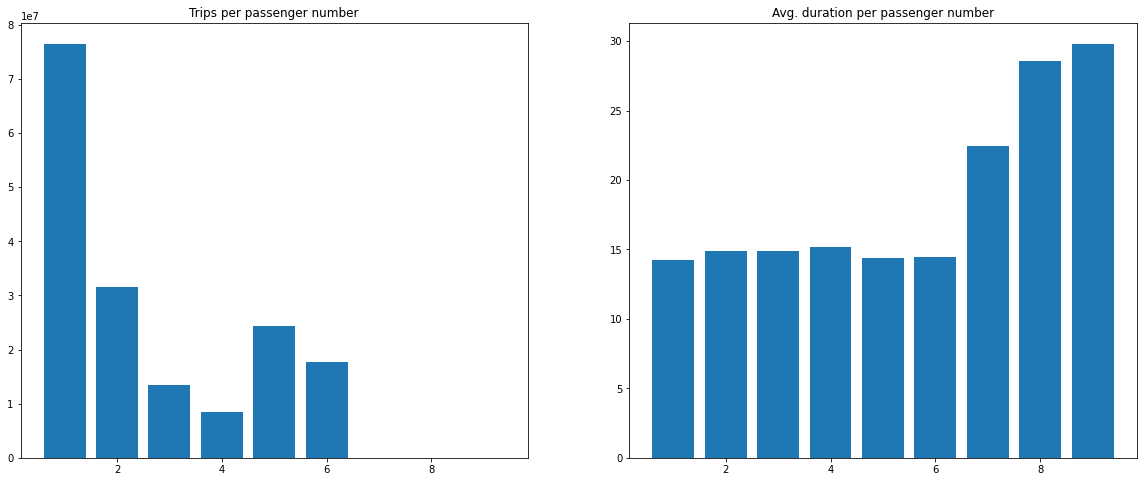

In [43]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.bar(count_passengers_df.passenger_count, count_passengers_df.record_count)
plt.title("Trips per passenger number")
plt.subplot(122)
plt.bar(count_passengers_df.passenger_count, count_passengers_df.avg_duration)
plt.title("Avg. duration per passenger number")
plt.show()

In [44]:
%%bigquery count_passengers_flag_df
SELECT
    flag_5_seat_car,
    COUNT(flag_5_seat_car) AS record_count,
    AVG(trip_duration) AS avg_duration
FROM `event-driven-ml.edml_nyc_yellow_taxi_us.viz_gis_feat_eng_2018`
GROUP BY flag_5_seat_car
ORDER BY flag_5_seat_car ASC

In [45]:
count_passengers_flag_df

,flag_5_seat_car,record_count,avg_duration
0,0.0,7831691,14.400153
1,1.0,98942467,14.378197


In [46]:
%%bigquery trip_passengers_df
SELECT
    trip_distance AS actual_distance,
    trip_duration,
    passenger_count,
    flag_5_seat_car,
FROM `event-driven-ml.edml_nyc_yellow_taxi_us.viz_gis_feat_eng_2018`
LIMIT 10000

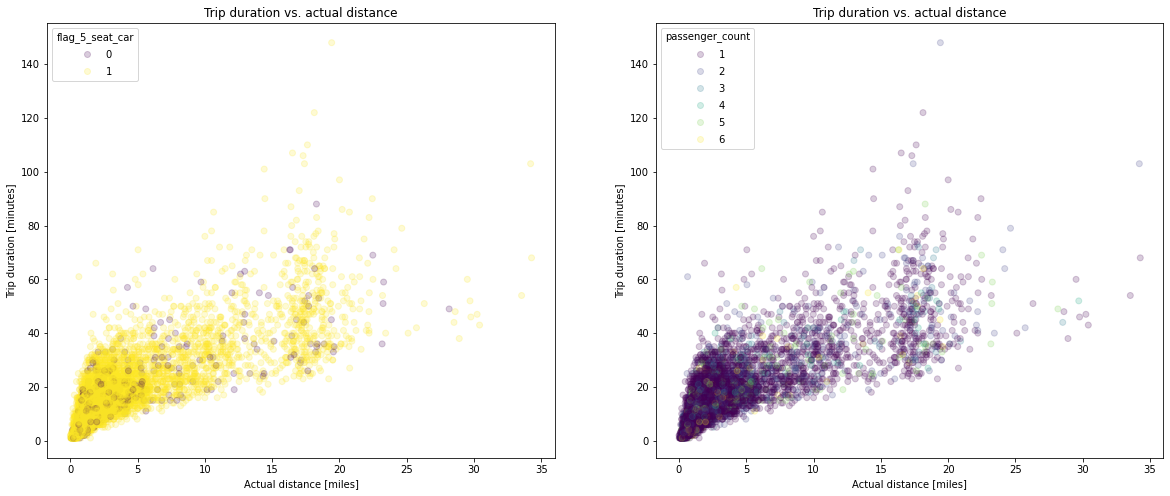

In [48]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
scatter = plt.scatter(trip_passengers_df.actual_distance, trip_passengers_df.trip_duration, c=trip_passengers_df.flag_5_seat_car, alpha=.2)
plt.legend(*scatter.legend_elements(), loc="upper left", title="flag_5_seat_car")
plt.xlabel("Actual distance [miles]")
plt.ylabel("Trip duration [minutes]")
plt.title("Trip duration vs. actual distance")
plt.subplot(122)
scatter = plt.scatter(trip_passengers_df.actual_distance, trip_passengers_df.trip_duration, c=trip_passengers_df.passenger_count, alpha=.2)
plt.legend(*scatter.legend_elements(), loc="upper left", title="passenger_count")
plt.xlabel("Actual distance [miles]")
plt.ylabel("Trip duration [minutes]")
plt.title("Trip duration vs. actual distance")
plt.show();